<a href="https://colab.research.google.com/github/Saketkr06/Machine-learning-projects/blob/main/DL_Project_3_Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:06<00:00, 229MB/s]
100% 812M/812M [00:06<00:00, 132MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.5381.jpg', 'cat.5524.jpg', 'dog.4080.jpg', 'cat.1132.jpg', 'cat.5506.jpg', 'dog.9765.jpg', 'cat.7145.jpg', 'dog.6998.jpg', 'dog.11450.jpg', 'cat.10494.jpg', 'cat.260.jpg', 'cat.10529.jpg', 'dog.4342.jpg', 'cat.2842.jpg', 'cat.10159.jpg', 'dog.11390.jpg', 'cat.4842.jpg', 'cat.10437.jpg', 'dog.1979.jpg', 'cat.267.jpg', 'cat.4757.jpg', 'dog.4086.jpg', 'dog.7918.jpg', 'cat.1793.jpg', 'cat.8538.jpg', 'dog.3145.jpg', 'cat.1669.jpg', 'dog.889.jpg', 'cat.5819.jpg', 'cat.11720.jpg', 'dog.8686.jpg', 'cat.5979.jpg', 'cat.5562.jpg', 'dog.4069.jpg', 'dog.5745.jpg', 'cat.10934.jpg', 'dog.6476.jpg', 'dog.4043.jpg', 'cat.3449.jpg', 'dog.4259.jpg', 'dog.7890.jpg', 'cat.11502.jpg', 'dog.6711.jpg', 'cat.7713.jpg', 'dog.3200.jpg', 'dog.8185.jpg', 'dog.11689.jpg', 'dog.4431.jpg', 'dog.9756.jpg', 'cat.966.jpg', 'dog.218.jpg', 'cat.7494.jpg', 'dog.8031.jpg', 'cat.1742.jpg', 'cat.8249.jpg', 'cat.4231.jpg', 'cat.12106.jpg', 'dog.3081.jpg', 'cat.5853.jpg', 'dog.7043.jpg', 'dog.10350.jpg', 'dog.2770.jpg', 

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

Displaying the images of dogs and cats

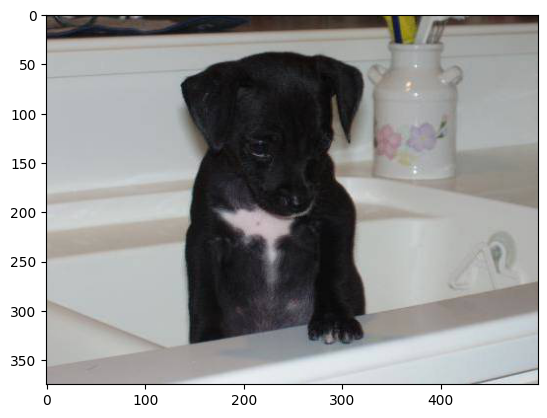

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

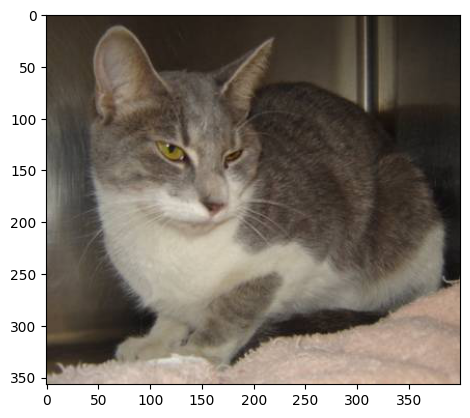

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])



cat
cat
dog
cat
cat


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

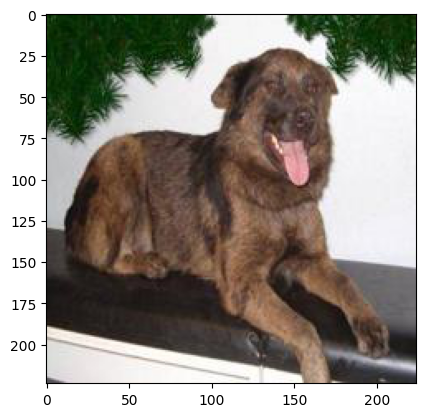

In [17]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10112.jpg')
imgplt = plt.imshow(img)
plt.show()

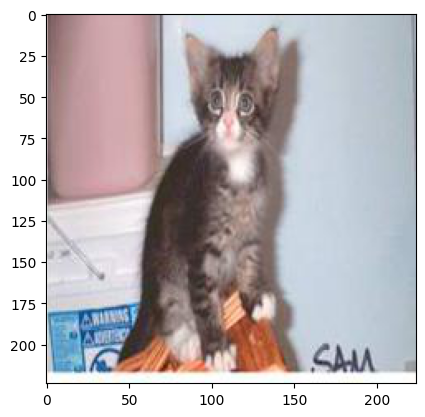

In [19]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4351.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [20]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:5])
print(len(filenames))

['cat.5381.jpg', 'cat.5524.jpg', 'dog.4080.jpg', 'cat.1132.jpg', 'cat.5506.jpg']
2000


In [22]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 0]
2000


In [23]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 981 1019]


Converting all the resized images to numpy arrays

In [24]:
import cv2
import glob

In [25]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [26]:
print(dog_cat_images)

[[[[ 63  67  68]
   [ 63  67  68]
   [ 62  66  67]
   ...
   [113 118 117]
   [115 120 119]
   [119 124 123]]

  [[ 64  68  69]
   [ 64  68  69]
   [ 63  67  68]
   ...
   [115 120 119]
   [117 122 121]
   [121 126 125]]

  [[ 65  69  70]
   [ 65  69  70]
   [ 65  69  70]
   ...
   [116 121 120]
   [117 122 121]
   [123 128 127]]

  ...

  [[ 27  38  36]
   [ 23  34  32]
   [ 30  38  37]
   ...
   [ 58  82 110]
   [ 56  80 108]
   [ 57  81 109]]

  [[ 31  42  40]
   [ 26  37  35]
   [ 29  40  38]
   ...
   [ 67  90 116]
   [ 69  92 118]
   [ 74  97 123]]

  [[ 34  45  43]
   [ 28  39  37]
   [ 31  42  40]
   ...
   [ 67  88 115]
   [ 74  95 122]
   [ 82 103 130]]]


 [[[ 99 125 139]
   [107 133 147]
   [115 141 155]
   ...
   [105 133 144]
   [105 133 144]
   [106 134 145]]

  [[ 96 122 136]
   [ 99 125 139]
   [103 129 143]
   ...
   [100 128 139]
   [101 129 140]
   [101 129 140]]

  [[101 127 141]
   [ 99 125 139]
   [ 99 125 139]
   ...
   [ 98 126 137]
   [ 99 127 138]
   [ 99 127

In [27]:
type(dog_cat_images)

numpy.ndarray

In [28]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [29]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [32]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
print(X_train_scaled)

[[[[0.30588235 0.29803922 0.25882353]
   [0.30980392 0.30196078 0.2627451 ]
   [0.31764706 0.30980392 0.27058824]
   ...
   [0.50588235 0.5372549  0.47058824]
   [0.50196078 0.5372549  0.45882353]
   [0.50196078 0.5372549  0.45882353]]

  [[0.30980392 0.30196078 0.2627451 ]
   [0.31372549 0.30588235 0.26666667]
   [0.32156863 0.31372549 0.2745098 ]
   ...
   [0.51372549 0.54509804 0.47843137]
   [0.50980392 0.54117647 0.4745098 ]
   [0.50588235 0.5372549  0.47058824]]

  [[0.30980392 0.30196078 0.25882353]
   [0.31372549 0.30588235 0.2627451 ]
   [0.32156863 0.31372549 0.27058824]
   ...
   [0.52941176 0.55686275 0.49803922]
   [0.52156863 0.54901961 0.49019608]
   [0.51764706 0.54509804 0.48627451]]

  ...

  [[0.2        0.36862745 0.49803922]
   [0.25490196 0.42352941 0.55294118]
   [0.27058824 0.43921569 0.56862745]
   ...
   [0.25882353 0.40784314 0.5254902 ]
   [0.25882353 0.40784314 0.5254902 ]
   [0.25490196 0.40392157 0.52156863]]

  [[0.23137255 0.4        0.52941176]
   [0.2

**Building the Neural Network**

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

In [35]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [36]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [37]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [38]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 15s 39ms/step - loss: 0.1824 - acc: 0.9312
Epoch 2/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0721 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0520 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 2s 42ms/step - loss: 0.0423 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0335 - acc: 0.9925


In [39]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 1s 75ms/step - loss: 0.0304 - acc: 0.9900
Test Loss = 0.030366573482751846
Test Accuracy = 0.9900000095367432


**Predictive System**

Path of the image to be predicted: /content/train/cat.1.jpg


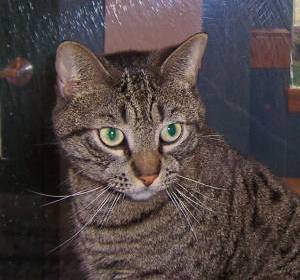

1/1 [==============================] - 1s 906ms/step
[[ 1.9935794 -3.1117482]]
0
The image represents a Cat


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/train/dog.1.jpg


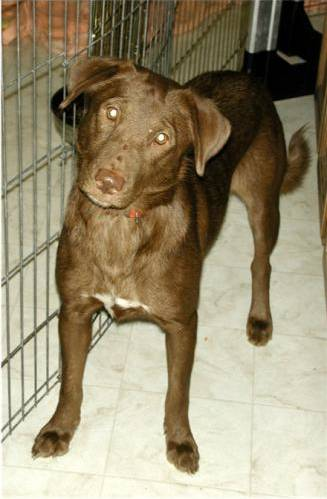

1/1 [==============================] - 0s 28ms/step
[[-3.703667  5.572667]]
1
The image represents a Dog


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')